# Cargue de datos s SciDB
## 1) Verificar Prerequisitos
### Python
SciDB-Py requires Python 2.6-2.7 or 3.3

In [1]:
import sys
sys.version
sys.version_info

sys.version_info(major=3, minor=4, micro=3, releaselevel='final', serial=0)

### NumPy
tested with version 1.9 (1.13.1)

In [2]:
import numpy
numpy.__version__

'1.13.1'

### Requests
tested with version 2.7 (2.18.1) Required for using the Shim interface to SciDB.

In [3]:
import requests
requests.__version__

'2.18.3'

### Pandas (optional)
tested with version 0.15. (0.20.3) Required only for importing/exporting SciDB arrays as Pandas Dataframe objects.

In [4]:
import pandas as pd
pd.__version__

'0.20.3'

### SciPy (optional)
tested with versions 0.10-0.12. (0.19.0) Required only for importing/exporting SciDB arrays as SciPy sparse matrices.

In [5]:
import scipy
scipy.__version__

'0.19.1'

## 2) Importar scidbpy
pip install git+https://github.com/davidgutierrez/SciDB-Py.git

In [6]:
import scidbpy
scidbpy.__version__

'16.9'

In [7]:
from scidbpy import connect

conectarse al servidor de Base de datos

In [8]:
sdb = connect('http://localhost:8080')

## 3) Leer archivo con cada una de las ondas

In [9]:
import urllib.request  # urllib2 in python2 the lib that handles the url stuff
target_url = "https://www.physionet.org/physiobank/database/mimic2wdb/matched/RECORDS-waveforms"
data = urllib.request.urlopen(target_url) # it's a file like object and works just like a file
#for line in data: # files are iterable
#    print line

In [10]:
lines = data.readlines();
line = str(lines[0])

In [11]:
carpeta,onda = line.replace('b\'','').replace('\'','').replace('\\n','').split("/")
onda

's00001-2896-10-09-01-56'

## 4) Importar WFDB para conectarse a physionet

In [12]:
import wfdb

In [33]:
carpeta = 's00079'
onda = 's00079-2756-08-14-01-25'
sig, fields = wfdb.srdsamp(onda,pbdir='mimic2wdb/matched/'+carpeta) #, sampfrom=11000

In [34]:
print(sig)
print("signame: " + str(fields['signame']))
print("units: " + str(fields['units']))
print("fs: " + str(fields['fs']))
print("comments: " + str(fields['comments']))
print("fields: " + str(fields))

[[    nan     nan     nan]
 [    nan     nan     nan]
 [    nan     nan     nan]
 ..., 
 [   0.96  118.4    59.2 ]
 [   0.96  118.4    59.2 ]
 [   0.96  118.4    59.2 ]]
signame: ['II', 'ABP', 'PAP']
units: ['mV', 'mmHg', 'mmHg']
fs: 125
comments: ['<age>: 52 <sex>: M']
fields: {'units': ['mV', 'mmHg', 'mmHg'], 'signame': ['II', 'ABP', 'PAP'], 'comments': ['<age>: 52 <sex>: M'], 'fs': 125}


In [15]:
signalII = None
try:
    signalII = fields['signame'].index("II")
except ValueError:
    print("List does not contain value")
if(signalII!=None):
    print("List contain value")


List contain value


In [36]:
#array = wfdb.processing.smooth(x=sig[:, 0])
array = numpy.asarray(sig[:,signalII], dtype=float)
arrayNun = array[~numpy.isnan(array)]
arrayNun
#array = array.reshape(-1, 1)

array([-0.22, -0.22, -0.16, ...,  0.96,  0.96,  0.96])

In [51]:
ondaName = onda.replace("-", "_")
if arrayNun.size>0 :
    sdb.input(upload_data=array).store(ondaName,gc=False)
#    sdb.iquery("store(input(<x:int64>[i], '{fn}', 0, '{fmt}'), "+ondaName+")", upload_data=array)

In [13]:
dir(sdb.arrays)

['s00001_2896_10_10_00_31',
 's00020_2567_03_30_17_47',
 's00033_2559_01_25_12_35',
 's00033_2559_01_26_13_11',
 's00052_3036_03_14_02_21',
 's00052_3036_03_14_12_15',
 's00076_3103_08_06_18_45',
 's00079_2756_08_14_01_25',
 's00079_2756_08_14_12_28',
 's00123_2772_11_02_03_01',
 's00123_2772_11_03_12_58',
 's00124_3297_08_03_21_51',
 's00124_3297_08_04_15_23',
 's00124_3297_08_12_01_20',
 's00135_2909_04_11_10_04',
 's00138_2817_11_01_13_39',
 's00151_2509_04_12_15_19',
 's00151_2509_04_15_12_12',
 's00151_2509_04_16_14_43',
 's00177_3299_12_03_12_35',
 's00194_2675_05_03_14_34',
 's00208_2955_05_18_00_06',
 's00214_3084_11_28_16_23',
 's00214_3084_12_02_22_02',
 's00217_2669_08_23_12_28',
 's00262_2554_11_12_18_06']

In [69]:
#for line in dir(sdb.arrays):
#    sdb.iquery('remove('+line+')')

In [74]:
myArryay = sdb.iquery('scan(s00001_2896_10_10_00_31)', fetch=True, as_dataframe=True)

In [75]:
myArryay["x"].plot()

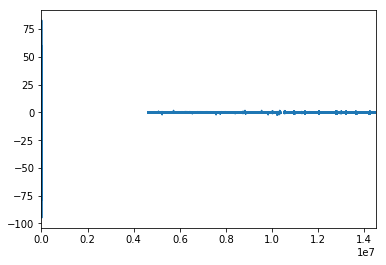

In [76]:
import matplotlib.pyplot as plt
plt.show()

In [56]:
myArryay

,i,x
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN
5,5,NaN
6,6,NaN
7,7,NaN
8,8,NaN
9,9,NaN


In [43]:
array

array([  nan,   nan,   nan, ...,  0.96,  0.96,  0.96])

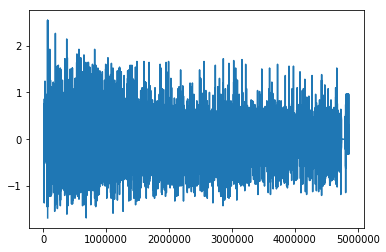

In [44]:
import matplotlib.pyplot as plt
plt.plot(array)
plt.show()